# Experiments in Extreme Value Theory (EVT)

## Dependencies

In [10]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from IPython.core.pylabtools import figsize
from IPython.display import display, Math

import numpy as np
import pandas as pd

import scipy as sp
#from scipy.optimize import minimize
from scipy.stats import genextreme

import fitdist as fd  # Finds distribution that best fits dataset
import warnings
warnings.simplefilter('ignore')

print(f"    Pandas {pd.__version__}")
print(f"     NumPy {np.__version__}")
print(f"MatPlotLib {matplotlib.__version__}")
print(f"     SciPy {sp.__version__}")

    Pandas 1.0.3
     NumPy 1.18.1
MatPlotLib 3.1.3
     SciPy 1.4.1


## References

[Cole 2001] Stuart Cole, <i>"An Introduction to Statistical Modeling of Extreme Values"</i>, 2001.

## The Generalized Extreme Value (GEV) Distribution

The GEV family of probability densities is described as follows in [Cole 2001]:

$G(z;\mu,\sigma,\xi) = \exp \left( - \left[ 1 + \xi \left( \frac {z - \mu} {\sigma} \right) \right]^{-1/\xi} \right)$

<p>where
<p>$-\infty < \mu < \infty$,
<p>$\sigma > 0$,
<p>$-\infty < \xi < \infty$,
<p>and $z$ is such that $1 + \xi(z - \mu)/\sigma > 0$

NOTE: The shape parameter, $\xi$, in <b><i>scipy.stats.genextreme</i></b> is the <u><b>negative</b></u> of the shape parameter in R's <i><b>ismev</b></i> library.

SciPy.stats.genextreme, a generalized extreme value continuous random variable, is [documented here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genextreme.html).

## Example 1

In [2]:
from scipy.stats import norm, genextreme

mean = 100.0
sdev = 10.0

rv = norm(loc=mean, scale=sdev)  # "Frozen" random variable

In [3]:
def source_pdf(x):
    return norm.pdf(x, loc=mean, scale=sdev)

In [4]:
n = 300  # Number of samples
m = 12  # Size of each sample

samples = [rv.rvs(size=m) for _ in range(n)]
#samples[:3] # First 3 samples

In [5]:
maxes = [np.max(sample) for sample in samples]
maxes[:3]  # First 3 maximums of samples

[112.27668987058689, 110.8856940571808, 119.3170545370896]

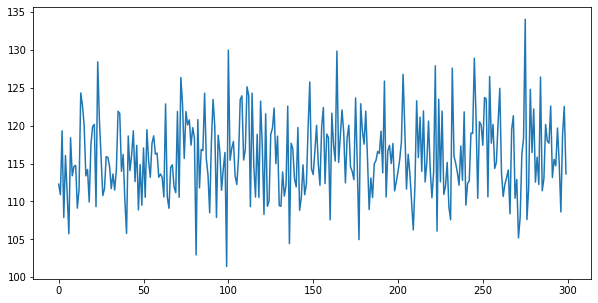

In [6]:
figsize(10,5)
plt.plot(maxes)

In [7]:
mle = genextreme.fit(maxes)

xi, mu, sigma = mle
print(f"   mu = {mu}\nsigma = {sigma}\n   xi = {xi}")

   mu = 113.87055953325873
sigma = 4.9982123130390494
   xi = 0.18855858744303056


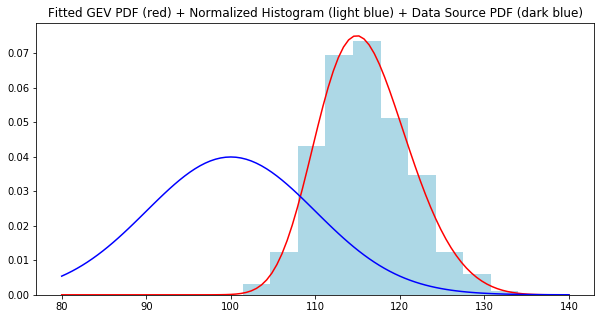

In [8]:
def maxes_pdf(x):
    return genextreme.pdf(x, xi, loc=mu, scale=sigma)

x = np.linspace(80.0, 140.0, num=100)
y = [maxes_pdf(z) for z in x]
u = [source_pdf(z) for z in x]

plt.title("Fitted GEV PDF (red) + Normalized Histogram (light blue) + Data Source PDF (dark blue)")
plt.plot(x,y, color='Red')  # GEV PDF
plt.plot(x,u, color='Blue')  # Data Source PDF
_ = plt.hist(maxes, density=1, color='LightBlue')  # Histogram of Maxes

In [11]:
fit_results = fd.find_best_fit_distributions(maxes,
                                             dist_names = fd.common_cont_dist_names,
                                             goodness_of_fit_pvalue = 0.25,
                                             drop_dist_names = []
                                            )

In [12]:
fit_results

[['exponweib',
  (19.626602818537002,
   4.298843216038563,
   49.197757393925514,
   50.12883660226419),
  0.9972581405448818],
 ['alpha',
  (19.933824847878057, 11.520103352392281, 2076.3579417892897),
  0.993147324281394],
 ['lognorm',
  (0.10011386600913294, 63.357935110054036, 52.325952270127615),
  0.9927068209171831],
 ['chi2',
  (88.0016688490831, 80.9271055285461, 0.397881921255266),
  0.9925144232570464],
 ['fatiguelife',
  (0.09985117054597939, 63.156145263180726, 52.52876115585208),
  0.9923668963256983],
 ['powerlognorm',
  (0.4153291078005834,
   0.027834382138166025,
   -25.807813827097675,
   138.0570357176523),
  0.9912495027562823],
 ['gamma',
  (46.40861872577693, 80.00001749262628, 0.7745706265045593),
  0.9910737285029023],
 ['beta',
  (30.86224939127822,
   210.0411761730516,
   84.48619339884965,
   245.63298778327675),
  0.9861514525385177],
 ['genextreme',
  (0.18855858744303056, 113.87055953325873, 4.9982123130390494),
  0.98216645644993],
 ['powernorm',
  (0.

In [18]:
fit_xi, fit_mu, fit_sigma = fit_results[8][1]
print(f"   fit_mu = {fit_mu}\nfit_sigma = {fit_sigma}\n   fit_xi = {fit_xi}")

   fit_mu = 113.87055953325873
fit_sigma = 4.9982123130390494
   fit_xi = 0.18855858744303056
